In [57]:
from sklearn import datasets
import numpy as np

In [58]:
iris = datasets.load_iris()
X= iris.data[:, :2]
y = (iris.target != 0 ) *1

In [59]:
X[0:5,:]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [60]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Algorithm
Given a set of inputs X, we want to assign them to one of two possible categories (0 or 1). Logistic regression models the probability that each input belongs to a particular category.

Hypothesis
A function takes inputs and returns outputs. To generate probabilities, logistic regression uses a function that gives outputs between 0 and 1 for all values of X. There are many functions that meet this description, but the used in this case is the logistic function. From here we will refer to it as sigmoid.

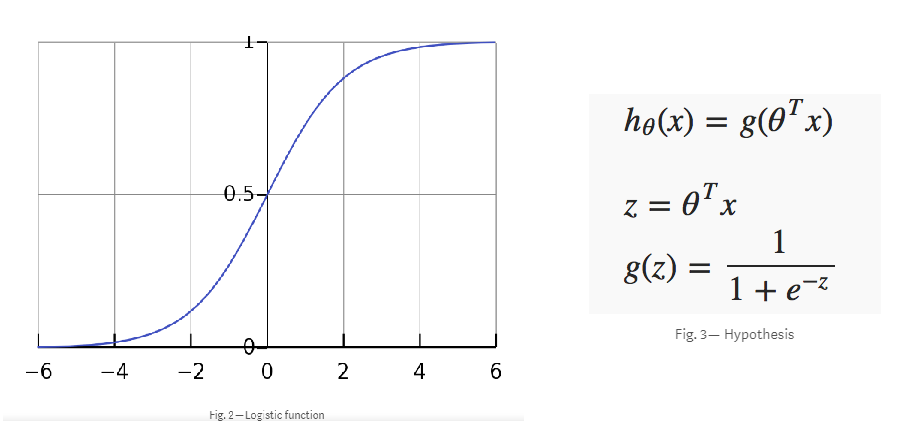

In [61]:
from IPython.display import Image
Image(filename=r'C:\Users\athiq.ahmed\Desktop\Other\Python code\ML\Logistic regression\Diagrams\Sigmoid function.png'
      ,width="500")

In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

z = np.dot(X, theta)
h = sigmoid(z)

Loss function
Functions have parameters/weights (represented by theta in our notation) and we want to find the best values for them. To start we pick random values and we need a way to measure how well the algorithm performs using those random weights. That measure is computed using the loss function, defined as:

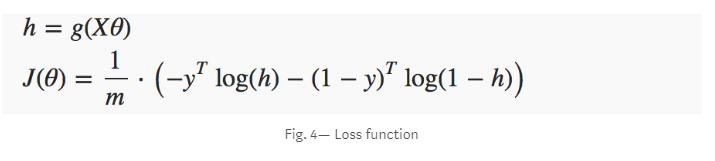

In [62]:
from IPython.display import Image
Image(filename=r'C:\Users\athiq.ahmed\Desktop\Other\Python code\ML\Logistic regression\Diagrams\Loss function.png'
      ,width="500")

In [53]:
def loss(h,y):
    return (-y * np.log(h) - (1-y)*np.log(1-h)).mean()

Gradient descent
Our goal is to minimize the loss function and the way we have to achive it is by increasing/decreasing the weights, i.e. fitting them. The question is, how do we know what parameters should be biggers and what parameters should be smallers? The answer is given by the derivative of the loss function with respect to each weight. It tells us how loss would change if we modified the parameters.

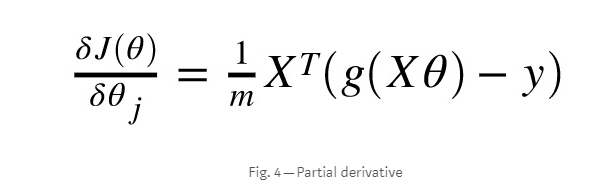

In [63]:
from IPython.display import Image
Image(filename=r'C:\Users\athiq.ahmed\Desktop\Other\Python code\ML\Logistic regression\Diagrams\Gradient - partial derivative.png'
      ,width="300")

In [ ]:
gradient = np.dot(X.T, (h-y)) / y.shape[0]

Then we update the weights by substracting to them the derivative times the learning rate.

In [ ]:
lr = 0.01
theta -= lr * gradient

We should repeat this steps several times until we reach the optimal solution.

Predictions
By calling the sigmoid function we get the probability that some input x belongs to class 1. Let’s take all probabilities ≥ 0.5 = class 1 and all probabilities < 0 = class 0. This threshold should be defined depending on the business problem we were working.

In [ ]:
def predict_probs(X, theta):
    return sigmoid(np.dot(X, theta))

def predict(X, theta, threshold = 0.5):
    return predict_probs(X, theta) >= threshold

Putting it all together

In [75]:
class LogisticRegression:
    def __init__(self, lr =0.01, num_iter=10000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        
    def __add_intercept(self,X):
        intercept = np.ones((X.shape[0],1))
        return np.concatenate((intercept,X), axis =1)
    
    def __sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def __loss(self,h,y):
        return (-y*np.log(h) - (1-y)*np.log(1-h)).mean()
    
    def fit(self,X,y):
        if self.fit_intercept:
            X=self.__add_intercept(X)
            
        #weights initialization
        self.theta=np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z=np.dot(X, self.theta)
            h=self.__sigmoid(z)
            gradient=np.dot(X.T, (h-y))/y.size
            self.theta-=self.lr*gradient
            
#             if(self.verbose==True and i%10000==0):
#                 z=np.dot(X, self.theta)
#                 h=self.__sigmoid(z)
#                 print(f'loss: {self.__loss(h,y)}\t')
        
    def predict_prob(self,X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        return self.sigmoid(np.dot(X,theta))
    
    def predict(self,X,threshold):
        return self.predict_prob(X) > threshold
            
    

In [76]:
model = LogisticRegression(lr=0.1, num_iter=30000)
%time model.fit(X,y)

Wall time: 1.07 s


In [ ]:
preds = model.predict(X)
(preds==y).mean()

In [82]:
model.theta

array([ -6.40339799,   7.44778871, -10.92867716])

Further steps could be the addition of l2 regularization and multiclass classification

#### https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac